LINK TO THE DATASET:

https://drive.google.com/drive/folders/1EH1HFGhpPBy5dAiljlKHysvJ0C7t04xi?usp=drive_link

In [ ]:
pip install scipy

In [ ]:
pip install arff

  Preparing metadata (setup.py) ... done
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4950 sha256=1470664354a88f6b29bf42a86f03976c049360623adf4b89a020d56a85e51efb
  Stored in directory: /root/.cache/pip/wheels/0c/39/12/4d8ff491018bce2dd9cc6034298f27399c7f4fd4063187f7be
Successfully built arff


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
import warnings
import tensorflow as tf
from tensorflow.keras import layers, models
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
warnings.filterwarnings("ignore")

Read the .arff files and convert them into csv files


In [3]:
def load_arff_to_dataframe(file_path):
    # Load ARFF file
    years_before_bankruptcy_prediction= 6 - int(file_path.split('/')[-1][0])

    attributes = [
    'net_profit_div_by_total_assets',
    'total_liabilities_div_by_total_assets',
    'working_capital_div_by_total_assets',
    'current_assets_div_by_short-term_liabilities',
    '(cash_+_short-term_securities_+_receivables_-_short-term_liabilities)_div_by_(operating_expenses_-_depreciation)_mult_by_365',
    'retained_earnings_div_by_total_assets',
    'EBIT_div_by_total_assets',
    'book_value_of_equity_div_by_total_liabilities',
    'sales_div_by_total_assets',
    'equity_div_by_total_assets',
    '(gross_profit_+_extraordinary_items_+_financial_expenses)_div_by_total_assets',
    'gross_profit_div_by_short-term_liabilities',
    '(gross_profit_+_depreciation)_div_by_sales',
    '(gross_profit_+_interest)_div_by_total_assets',
    '(total_liabilities_mult_by_365)_div_by_(gross_profit_+_depreciation)',
    '(gross_profit_+_depreciation)_div_by_total_liabilities',
    'total_assets_div_by_total_liabilities',
    'gross_profit_div_by_total_assets',
    'gross_profit_div_by_sales',
    '(inventory_mult_by_365)_div_by_sales',
    'sales_(n)_div_by_sales_(n-1)',
    'profit_on_operating_activities_div_by_total_assets',
    'net_profit_div_by_sales',
    'gross_profit_(in_3_years)_div_by_total_assets',
    '(equity_-_share_capital)_div_by_total_assets',
    '(net_profit_+_depreciation)_div_by_total_liabilities',
    'profit_on_operating_activities_div_by_financial_expenses',
    'working_capital_div_by_fixed_assets',
    'logarithm_of_total_assets',
    '(total_liabilities_-_cash)_div_by_sales',
    '(gross_profit_+_interest)_div_by_sales',
    '(current_liabilities_mult_by_365)_div_by_cost_of_products_sold',
    'operating_expenses_div_by_short-term_liabilities',
    'operating_expenses_div_by_total_liabilities',
    'profit_on_sales_div_by_total_assets',
    'total_sales_div_by_total_assets',
    '(current_assets_-_inventories)_div_by_long-term_liabilities',
    'constant_capital_div_by_total_assets',
    'profit_on_sales_div_by_sales',
    '(current_assets_-_inventory_-_receivables)_div_by_short-term_liabilities',
    'total_liabilities_div_by_((profit_on_operating_activities_+_depreciation)_mult_by_(12_div_by_365))',
    'profit_on_operating_activities_div_by_sales',
    'rotation_receivables_+_inventory_turnover_in_days',
    '(receivables_mult_by_365)_div_by_sales',
    'net_profit_div_by_inventory',
    '(current_assets_-_inventory)_div_by_short-term_liabilities',
    '(inventory_mult_by_365)_div_by_cost_of_products_sold',
    'EBITDA_(profit_on_operating_activities_-_depreciation)_div_by_total_assets',
    'EBITDA_(profit_on_operating_activities_-_depreciation)_div_by_sales',
    'current_assets_div_by_total_liabilities',
    'short-term_liabilities_div_by_total_assets',
    '(short-term_liabilities_mult_by_365)_div_by_cost_of_products_sold)',
    'equity_div_by_fixed_assets',
    'constant_capital_div_by_fixed_assets',
    'working_capital',
    '(sales_-_cost_of_products_sold)_div_by_sales',
    '(current_assets_-_inventory_-_short-term_liabilities)_div_by_(sales_-_gross_profit_-_depreciation)',
    'total_costs_div_by_total_sales',
    'long-term_liabilities_div_by_equity',
    'sales_div_by_inventory',
    'sales_div_by_receivables',
    '(short-term_liabilities_mult_by_365)_div_by_sales',
    'sales_div_by_short-term_liabilities',
    'sales_div_by_fixed_assets','Class']

    data, meta = arff.loadarff(file_path)

    # Extract column names from meta


    # Convert data to DataFrame
    df = pd.DataFrame(data)
    df.columns=attributes
    df['Class'] = df['Class'].apply(lambda x: int(x.decode('utf-8')))
    df['years_before_bankruptcy_prediction']=years_before_bankruptcy_prediction
    return df

In [4]:
df_1_ye=load_arff_to_dataframe('/content/drive/MyDrive/SLE_Proj_polish_companies_bankruptcy_data/1year.arff')
df_2_ye=load_arff_to_dataframe('/content/drive/MyDrive/SLE_Proj_polish_companies_bankruptcy_data/2year.arff')
df_3_ye=load_arff_to_dataframe('/content/drive/MyDrive/SLE_Proj_polish_companies_bankruptcy_data/3year.arff')
df_4_ye=load_arff_to_dataframe('/content/drive/MyDrive/SLE_Proj_polish_companies_bankruptcy_data/4year.arff')
df_5_ye=load_arff_to_dataframe('/content/drive/MyDrive/SLE_Proj_polish_companies_bankruptcy_data/5year.arff')

In [5]:
df_1_ye

net_profit_div_by_total_assets  total_liabilities_div_by_total_assets  \
0                           0.200550                                0.37951   
1                           0.209120                                0.49988   
2                           0.248660                                0.69592   
3                           0.081483                                0.30734   
4                           0.187320                                0.61323   
...                              ...                                    ...   
7022                        0.018371                                0.47410   
7023                       -0.013359                                0.58354   
7024                        0.006338                                0.50276   
7025                       -0.041643                                0.84810   
7026                        0.014946                                0.94648   

      working_capital_div_by_total_assets  \
0                                 0.39641   
1                                 0.47225   
2                                 0.26713   
3                                 0.45879   
4                                 0.22960   
...                                   ...   
7022                             -0.13619   
7023                             -0.02265   
7024                              0.43923   
7025                             -0.12852   
7026                              0.03211   

      current_assets_div_by_short-term_liabilities  \
0                                          2.04720   
1                                          1.94470   
2                                          1.55480   
3                                          2.49280   
4                                          1.40630   
...                                            ...   
7022                                       0.60839   
7023                                       0.92896   
7024                                       1.87360   
7025                                       0.57485   
7026                                       1.03630   

      (cash_+_short-term_securities_+_receivables_-_short-term_liabilities)_div_by_(operating_expenses_-_depreciation)_mult_by_365  \
0                                               32.3510                                                                              
1                                               14.7860                                                                              
2                                               -1.1523                                                                              
3                                               51.9520                                                                              
4                                               -7.3128                                                                              
...                                                 ...                                                                              
7022                                           -18.4490                                                                              
7023                                           -42.2320                                                                              
7024                                             9.7417                                                                              
7025                                          -121.9200                                                                              
7026                                           -20.5810                                                                              

      retained_earnings_div_by_total_assets  EBIT_div_by_total_assets  \
0                                  0.388250                  0.249760   
1                                  0.000000                  0.258340   
2                                  0.00

In [6]:
dfs = [df_1_ye, df_2_ye, df_3_ye, df_4_ye, df_5_ye]
merged_df = pd.concat(dfs)
df=merged_df.sample(frac=1).reset_index(drop=True)
df['Labels'] = df['years_before_bankruptcy_prediction'].astype(str) + df['Class'].astype(str)

In [109]:
## Data Distribution for each column

plt.figure(figsize=(100, 100))
for i, col in enumerate(df.columns[:-2]):  # Exclude the last two columns (Class and years_before_bankruptcy_prediction)
    plt.subplot(11, 6, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col, fontsize=40, fontweight='bold')  # Set title font size and weight
    plt.xlabel(col, fontsize=30, fontweight='bold')  # Set x-axis label font size and weight
    plt.ylabel('Frequency', fontsize=30, fontweight='bold')  # Set y-axis label font size and weight
plt.tight_layout()
plt.show()

In [7]:
df.shape

(43405, 67)

In [8]:
df.isna().sum().sum()

41322

In [9]:
df.describe()

net_profit_div_by_total_assets  total_liabilities_div_by_total_assets  \
count                    43397.000000                           43397.000000   
mean                         0.035160                               0.590212   
std                          2.994109                               5.842748   
min                       -463.890000                            -430.870000   
25%                          0.003429                               0.268980   
50%                          0.049660                               0.471900   
75%                          0.129580                               0.688320   
max                         94.280000                             480.960000   

       working_capital_div_by_total_assets  \
count                         43397.000000   
mean                              0.114431   
std                               5.439429   
min                            -479.960000   
25%                               0.021521   
50%                               0.196610   
75%                               0.403390   
max                              28.336000   

       current_assets_div_by_short-term_liabilities  \
count                                  43271.000000   
mean                                       6.314702   
std                                      295.434425   
min                                       -0.403110   
25%                                        1.049500   
50%                                        1.569800   
75%                                        2.787450   
max                                    53433.000000   

       (cash_+_short-term_securities_+_receivables_-_short-term_liabilities)_div_by_(operating_expenses_-_depreciation)_mult_by_365  \
count                                       4.331600e+04                                                                              
mean                                       -3.853466e+02                                                                              
std                                         6.124303e+04                                                                              
min                                        -1.190300e+07                                                                              
25%                                        -4.908000e+01                                                                              
50%                                        -1.034500e+00                                                                              
75%                                         5.063425e+01                                                                              
max                                         1.250100e+06                                                                              

       retained_earnings_div_by_total_assets  EBIT_div_by_total_assets  \
count                           43397.000000              43397.000000   
mean                               -0.056107                  0.093478   
std                                 7.201326                  5.713075   
min                              -508.410000               -517.480000   
25%                                 0.000000                  0.005776   
50%                                 0.000000                  0.059634   
75%                                 0.089446                  0.150880   
max                               543.250000                649.230000   

       book_value_of_equity_div_by_total_liabilities  \
count                                   43311.000000   
mean                                       12.640779   
std                                       505.894281   
min                                      -141.410000   
25%                                         0.430275   
50%                                         1.070400   
75%                                         2.615700   
max                                     5343

In [10]:
null_cnt_df=pd.DataFrame(df.isna().sum())
null_cnt_df.columns=['Count']
null_cnt_df=null_cnt_df.sort_values(by=['Count'],ascending=False)

In [11]:
null_cnt_df.head(10)

Count
(current_assets_-_inventories)_div_by_long-term...  18984
sales_(n)_div_by_sales_(n-1)                         5854
profit_on_operating_activities_div_by_financial...   2764
sales_div_by_inventory                               2152
net_profit_div_by_inventory                          2147
gross_profit_(in_3_years)_div_by_total_assets         922
sales_div_by_fixed_assets                             812
equity_div_by_fixed_assets                            812
working_capital_div_by_fixed_assets                   812
constant_capital_div_by_fixed_assets                  812

In [12]:
columns_to_drop=['(current_assets_-_inventories)_div_by_long-term_liabilities']
df=df.drop(columns=columns_to_drop)

In [13]:
for column in df.columns:
    mode_val = df[column].median()


    df[column].fillna(mode_val, inplace=True)

In [14]:
df.isna().sum().sum()

0

In [15]:
df.shape

(43405, 66)

In [16]:
len(df[df['Class']==1])

2091

In [17]:
len(df[df['Class']==0])

41314

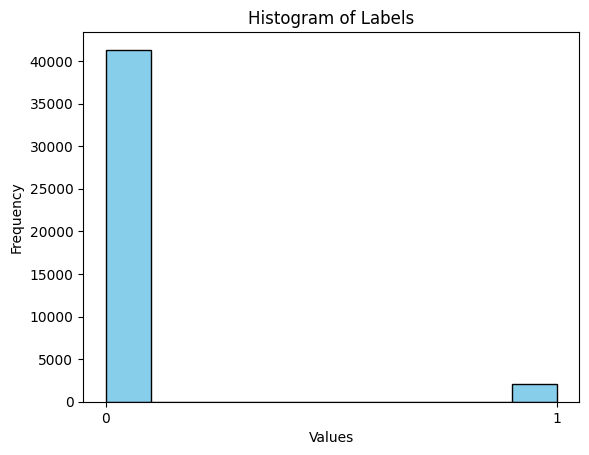

In [21]:
# Plot histogram
plt.hist(df['Class'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Labels')

# Set x-axis tick labels to 0 and 1
plt.xticks([0, 1])

# Show the plot
plt.show()

In [22]:
df_corr=df.copy()
df_corr.columns=["X"+str(i)  for i in range(len(df_corr.columns))]
correlation_matrix = df_corr.corr()

# Print or display the correlation matrix


In [23]:
cm=df.corr()
upper_tri = cm.where(~cm.isnull().values)

# Sort correlation values in descending order
sorted_corr = upper_tri.unstack().sort_values(ascending=False)

# Create DataFrame to store sorted correlation values and corresponding column names
df_corr_sorted = pd.DataFrame(sorted_corr, columns=['correlation'])
df_corr_sorted.reset_index(inplace=True)
df_corr_sorted.columns = ['column1', 'column2', 'correlation']
df_corr_sorted = df_corr_sorted[df_corr_sorted['column1'] != df_corr_sorted['column2']]

In [24]:
df_corr_sorted=df_corr_sorted.reset_index(drop=True)

In [25]:
df_corr_sorted.drop(df_corr_sorted.index[::2], inplace=True)

In [26]:
corr_09= df_corr_sorted[df_corr_sorted['correlation']>0.9]
corr_min_09 = df_corr_sorted[df_corr_sorted['correlation']<-0.9]

In [27]:
columns =list(corr_09['column2']) + list(corr_min_09['column1'])

In [28]:
columns

['EBIT_div_by_total_assets',
 'current_assets_div_by_short-term_liabilities',
 'Labels',
 'book_value_of_equity_div_by_total_liabilities',
 'gross_profit_div_by_sales',
 'gross_profit_div_by_sales',
 '(receivables_mult_by_365)_div_by_sales',
 'equity_div_by_total_assets',
 'constant_capital_div_by_fixed_assets',
 'net_profit_div_by_sales',
 'total_costs_div_by_total_sales',
 'gross_profit_div_by_total_assets',
 'gross_profit_div_by_total_assets',
 'sales_div_by_total_assets',
 '(inventory_mult_by_365)_div_by_sales',
 '(net_profit_+_depreciation)_div_by_total_liabilities',
 'rotation_receivables_+_inventory_turnover_in_days',
 '(receivables_mult_by_365)_div_by_sales',
 'sales_div_by_short-term_liabilities',
 '(receivables_mult_by_365)_div_by_sales',
 '(gross_profit_+_extraordinary_items_+_financial_expenses)_div_by_total_assets',
 '(gross_profit_+_depreciation)_div_by_total_liabilities',
 'profit_on_operating_activities_div_by_total_assets',
 'gross_profit_div_by_short-term_liabilities'

# EDA - Insights into the Data

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

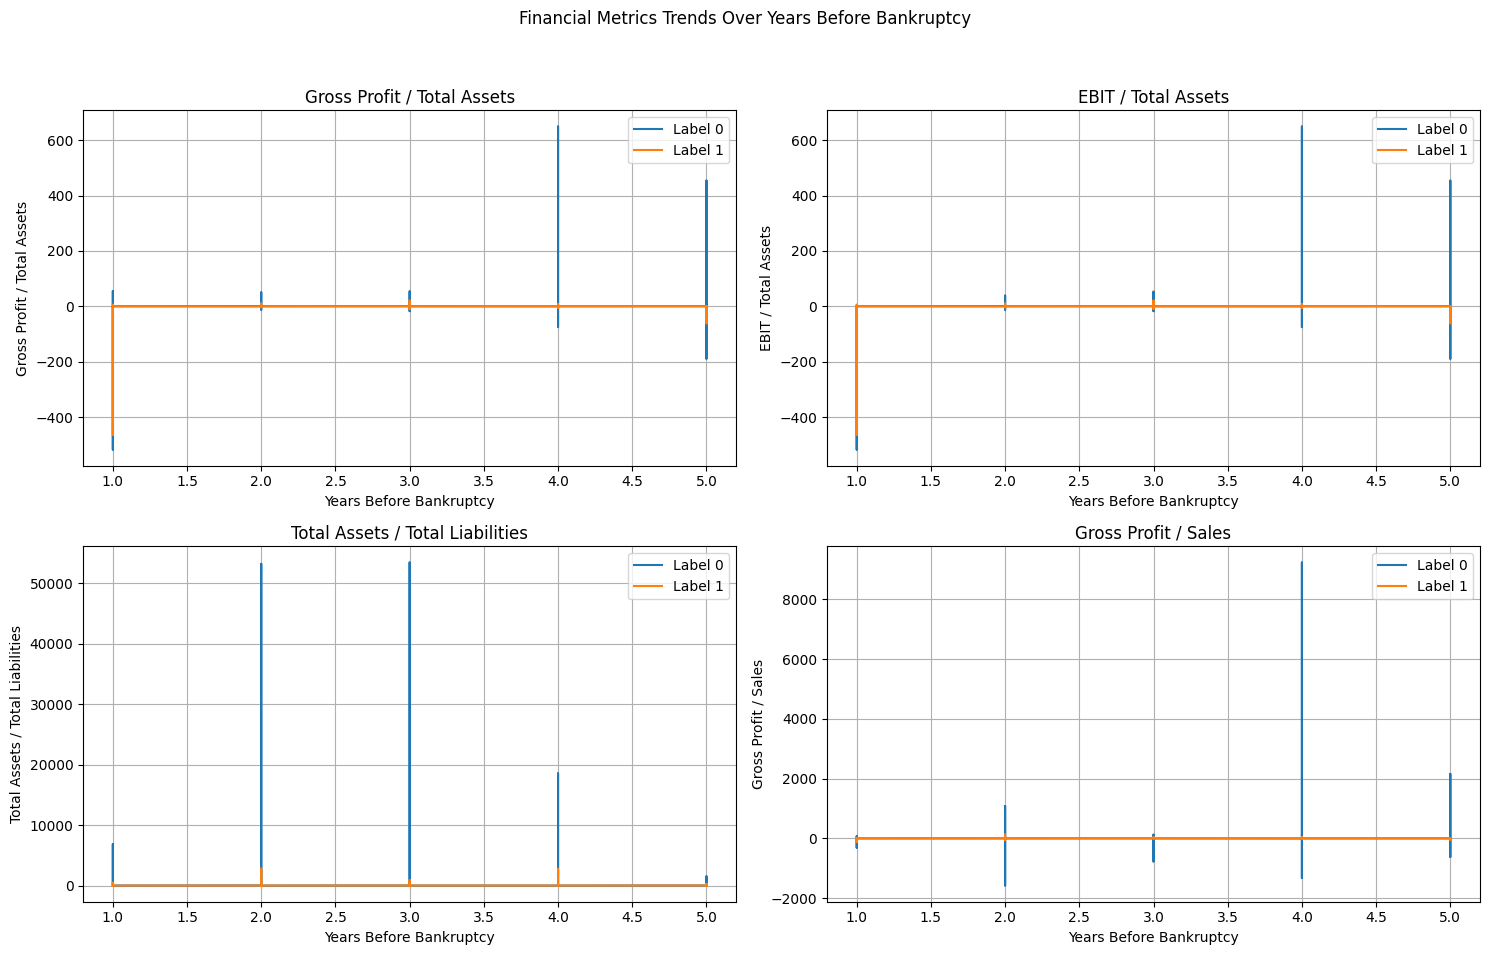

In [104]:
'''Gross Profit / Sales: The graph shows a sharp difference between non-bankrupt and bankrupt companies. The non-bankrupt companies have higher gross profit relative to sales,
suggesting better profitability. In contrast, the bankrupt companies exhibit flat or lower gross profit relative to sales, indicating potential inefficiencies in managing
cost of goods sold.

Total Assets / Total Liabilities: The high variance in this metric for non-bankrupt companies may reflect fluctuations in asset management. The bankrupt companies display a
more consistent and lower total assets-to-liabilities ratio, hinting at financial constraints or less effective asset utilization.

EBIT / Total Assets: The difference in this metric between the two classes may indicate that non-bankrupt companies generate higher earnings from their assets, pointing to
more robust operational performance. The consistency in the bankrupt class could imply a lack of profitability even in the years leading to bankruptcy.'''


df.sort_values(by='years_before_bankruptcy_prediction', inplace=True)

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Financial Metrics Trends Over Years Before Bankruptcy')

# Plotting 'gross_profit_div_by_total_assets'
for label, group in df.groupby('Class'):
    axes[0, 0].plot(group['years_before_bankruptcy_prediction'], group['gross_profit_div_by_total_assets'], label=f'Label {label}')
axes[0, 0].set_title('Gross Profit / Total Assets')
axes[0, 0].set_xlabel('Years Before Bankruptcy')
axes[0, 0].set_ylabel('Gross Profit / Total Assets')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plotting 'EBIT_div_by_total_assets'
for label, group in df.groupby('Class'):
    axes[0, 1].plot(group['years_before_bankruptcy_prediction'], group['EBIT_div_by_total_assets'], label=f'Label {label}')
axes[0, 1].set_title('EBIT / Total Assets')
axes[0, 1].set_xlabel('Years Before Bankruptcy')
axes[0, 1].set_ylabel('EBIT / Total Assets')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plotting 'total_assets_div_by_total_liabilities'
for label, group in df.groupby('Class'):
    axes[1, 0].plot(group['years_before_bankruptcy_prediction'], group['total_assets_div_by_total_liabilities'], label=f'Label {label}')
axes[1, 0].set_title('Total Assets / Total Liabilities')
axes[1, 0].set_xlabel('Years Before Bankruptcy')
axes[1, 0].set_ylabel('Total Assets / Total Liabilities')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plotting 'gross_profit_div_by_sales'
for label, group in df.groupby('Class'):
    axes[1, 1].plot(group['years_before_bankruptcy_prediction'], group['gross_profit_div_by_sales'], label=f'Label {label}')
axes[1, 1].set_title('Gross Profit / Sales')
axes[1, 1].set_xlabel('Years Before Bankruptcy')
axes[1, 1].set_ylabel('Gross Profit / Sales')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplots to fit into figure area.
plt.show()

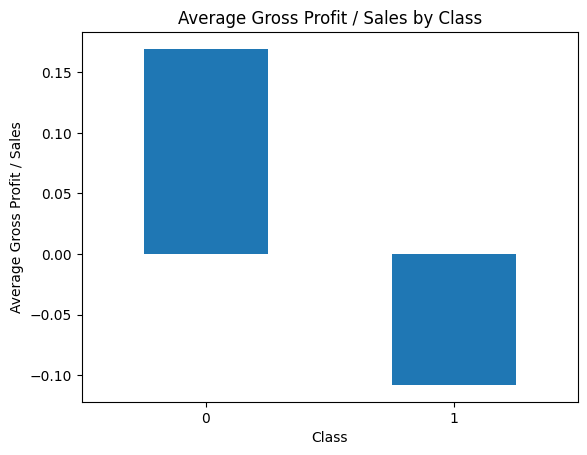

In [105]:
'''
The bar chart illustrates a significant gap in the 'gross profit divided by sales' ratio between non-bankrupt (Class 0) and bankrupt (Class 1) companies.
Non-bankrupt companies maintain a much higher gross profit margin, indicating a healthier financial position and better operational efficiency.
In contrast, bankrupt companies have a negative gross profit margin, suggesting they incur more costs than revenue, a clear indicator of financial distress.
This sharp contrast highlights gross profit margin as a critical metric for predicting potential bankruptcy, underscoring the need for companies to control costs
and manage sales efficiently to maintain profitability.'''

# Mean comparison using bar chart
mean_values = df.groupby('Class')['gross_profit_div_by_sales'].mean()
mean_values.plot(kind='bar')
plt.title('Average Gross Profit / Sales by Class')
plt.xlabel('Class')
plt.ylabel('Average Gross Profit / Sales')
plt.xticks(rotation=0)  # Keeps the class labels horizontal
plt.show()

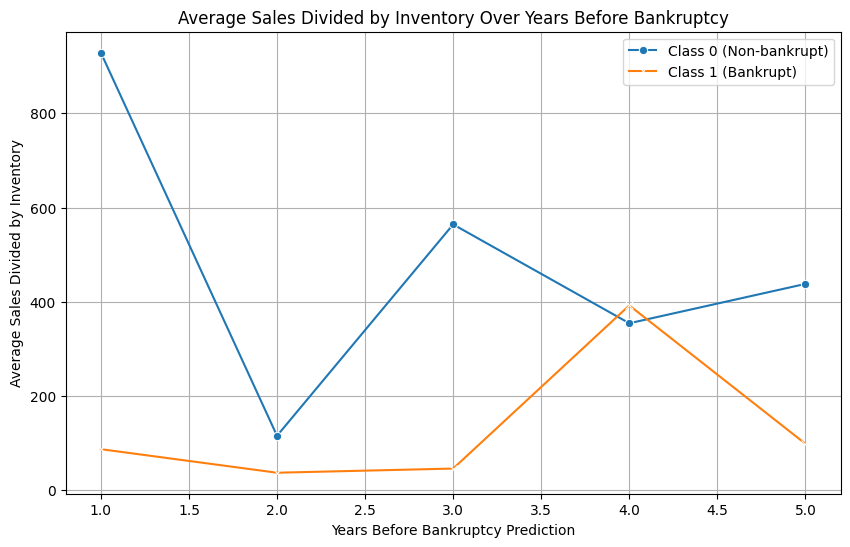

In [106]:
''' Non-bankrupt companies (Class 0) maintain a consistently higher 'average sales divided by inventory' ratio compared to bankrupt companies (Class 1) over the
years leading to bankruptcy prediction. This trend could indicate that non-bankrupt companies manage their inventory more efficiently, generating higher sales per unit
of inventory. The graph also shows a notable dip and peak in the sales-to-inventory ratio for non-bankrupt companies around Year 3, suggesting a potential anomaly or
event affecting inventory management or sales. In contrast, bankrupt companies show a relatively flat and lower trend, implying a possible struggle to effectively convert
inventory into sales, which could be an indicator of financial distress. These insights underscore the importance of inventory management
as a factor in financial stability.'''

import matplotlib.pyplot as plt
import seaborn as sns


# Filter the DataFrame for each class
class_0_data = df[df['Class'] == 0]
class_1_data = df[df['Class'] == 1]

# Aggregate the data by years and calculate the mean of 'sales_div_by_inventory' for each class
class_0_aggregated = class_0_data.groupby('years_before_bankruptcy_prediction')['sales_div_by_inventory'].mean().reset_index()
class_1_aggregated = class_1_data.groupby('years_before_bankruptcy_prediction')['sales_div_by_inventory'].mean().reset_index()

# Now, let's plot the aggregated data
plt.figure(figsize=(10, 6))

# Plot for Class 0
sns.lineplot(data=class_0_aggregated, x='years_before_bankruptcy_prediction', y='sales_div_by_inventory',
             label='Class 0 (Non-bankrupt)', marker='o')

# Plot for Class 1
sns.lineplot(data=class_1_aggregated, x='years_before_bankruptcy_prediction', y='sales_div_by_inventory',
             label='Class 1 (Bankrupt)', marker='x')

# Customize the plot with titles and labels
plt.title('Average Sales Divided by Inventory Over Years Before Bankruptcy')
plt.xlabel('Years Before Bankruptcy Prediction')
plt.ylabel('Average Sales Divided by Inventory')
plt.legend()
plt.grid(True)
plt.show()


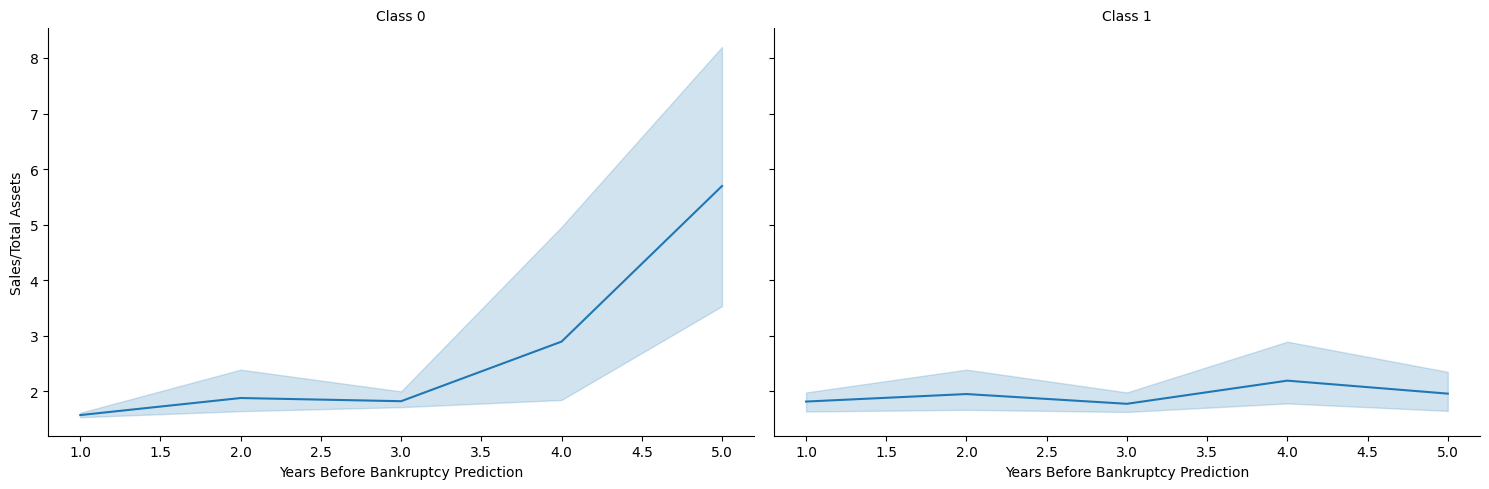

In [107]:
'''The visualizations indicate that non-bankrupt companies generally show an increasing trend in sales efficiency, suggesting they are better at utilizing their
assets to generate revenue. In contrast, bankrupt companies exhibit a relatively flat trend, indicating a lack of improvement in sales efficiency, which might
contribute to financial distress. The higher variability in non-bankrupt companies points to a broader range of business models or strategies, while the steady
trends for bankrupt companies could signal limited operational flexibility. Overall, these insights highlight the predictive value of 'sales_div_by_total_assets'
in assessing financial health and the risk of bankruptcy. '''

# Create a FacetGrid to plot 'sales_div_by_total_assets' over time for each Class
g = sns.FacetGrid(df, col='Class', height=5, aspect=1.5)
g.map(sns.lineplot, 'years_before_bankruptcy_prediction', 'sales_div_by_total_assets')
g.set_axis_labels('Years Before Bankruptcy Prediction', 'Sales/Total Assets')
g.set_titles("Class {col_name}")
plt.show()


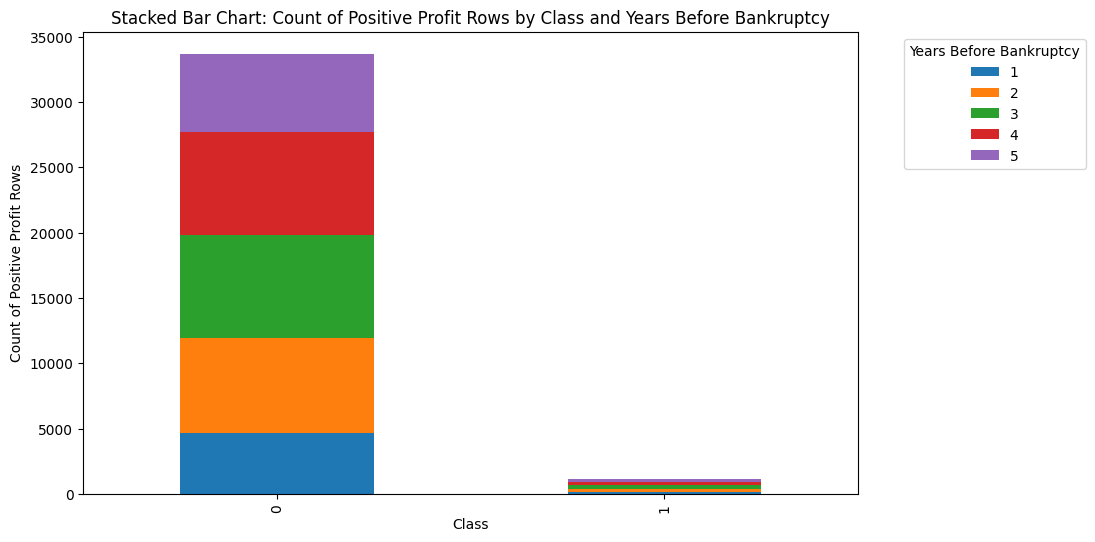

In [108]:
'''
The stacked bar chart illustrates a significant disparity between non-bankrupt (Class 0) and bankrupt (Class 1) companies in terms of the count of rows
with positive 'profit_on_sales_div_by_total_assets'. Class 0 shows a large number of positive instances, distributed across the years leading to bankruptcy prediction,
suggesting a consistent pattern of profitability. In contrast, Class 1 has a much lower count of positive profit rows, indicating financial struggles and a higher risk
of bankruptcy. The pronounced gap between the two classes highlights the importance of operational efficiency and profitability as key factors in financial stability,
with the data implying that companies with fewer instances of positive profit are more likely to face financial distress. '''

positive_profit = df[df['profit_on_sales_div_by_total_assets'] > 0]

# Group by 'Class' and 'years_before_bankruptcy_prediction', then count the rows for each group
grouped = positive_profit.groupby(['Class', 'years_before_bankruptcy_prediction']).count().unstack()

# Create a stacked bar chart with 'Class' on the X-axis and stacks representing the count for each year
grouped['profit_on_sales_div_by_total_assets'].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Stacked Bar Chart: Count of Positive Profit Rows by Class and Years Before Bankruptcy')
plt.xlabel('Class')
plt.ylabel('Count of Positive Profit Rows')
plt.legend(title='Years Before Bankruptcy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()  # Display the stacked bar chart

# Data Preprocessing - Continue - Dropping highly corelated Columns

In [29]:
df_upd = df.drop(columns=columns)

In [30]:
df_upd

net_profit_div_by_total_assets  \
0                            0.036882   
1                            0.227700   
2                            0.022695   
3                            0.005942   
4                            0.084198   
...                               ...   
43400                        0.244430   
43401                        0.142000   
43402                        0.011689   
43403                        0.010230   
43404                        0.070102   

       (cash_+_short-term_securities_+_receivables_-_short-term_liabilities)_div_by_(operating_expenses_-_depreciation)_mult_by_365  \
0                                                56.5650                                                                              
1                                                -7.5833                                                                              
2                                                10.2400                                                                              
3                                                62.0400                                                                              
4                                                10.7550                                                                              
...                                                  ...                                                                              
43400                                            -6.7233                                                                              
43401                                           -12.3460                                                                              
43402                                            17.7360                                                                              
43403                                           -17.5550                                                                              
43404                                            22.4990                                                                              

       retained_earnings_div_by_total_assets  \
0                                   0.077219   
1                                   0.220200   
2                                   0.000000   
3                                   0.055310   
4                                   0.314760   
...                                      ...   
43400                               0.607540   
43401                               0.000000   
43402                               0.000000   
43403                              -0.001917   
43404                               0.810520   

       (gross_profit_+_depreciation)_div_by_sales  \
0                                        0.046505   
1                                        0.118650   
2                                        0.016371   
3                                        0.100500   
4                                        0.063848   
...                                           ...   
43400                                    0.180470   
43401                                    0.050856   
43402                                    0.045211   
43403                                    0.037853   
43404                                    0.069865   

       (total_liabilities_mult_by_365)_div_by_(gross_profit_+_depreciation)  \
0                                                2163.50                      
1                                                 564.05                      
2                                                5721.20                      
3                                                1043.50                      
4                                                 663.85                      
...                                                  ...                      
43400                                             355.92                      
43401                                          

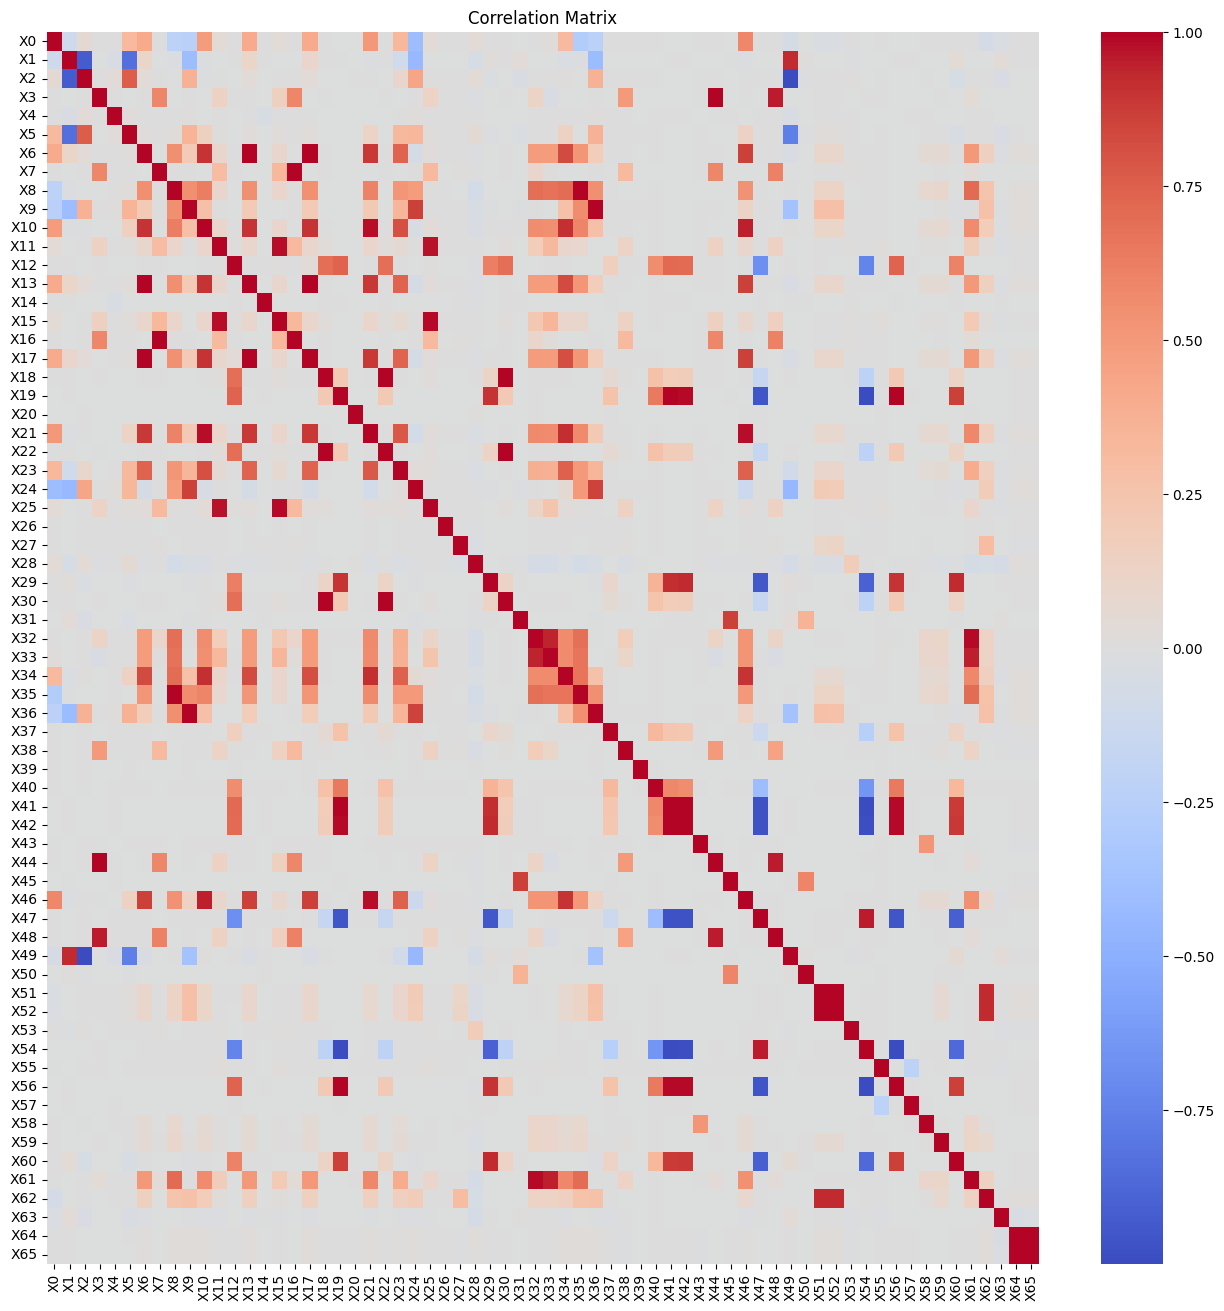

In [31]:
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
X=df_upd.drop(columns=['Class'])
y=df_upd['Class']

In [33]:
print("Class distribution before resampling:", Counter(y))

Class distribution before resampling: Counter({0: 41314, 1: 2091})


# Logistic Regression :

In [73]:
class LogisticRegression:

    def __init__(self,X,y,learningRate, maxIteration, tolerance):
        self.X=X
        self.y=y
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.tolerance = tolerance



    def add_x0(self,X):
      return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig


    def costFunction(self, X, y,val):
        if val == 0:
          sig = self.sigmoid(X.dot(self.w))
          loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
          cost = - loss.sum()
          return cost
        elif val==1:
          X=self.test_scaling(X,self.scale)
          sig = self.sigmoid(X.dot(self.w))
          loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
          cost = - loss.sum()
          return cost


    def gradient(self, X, y):
      sig = self.sigmoid(X.dot(self.w))
      grad = (sig - y).dot(X)
      return grad



    def gradientDescent(self, X, y,X_val,y_val):
        losses = []
        val_losses = []
        prev_loss = float('inf')

        for i in tqdm(range(self.maxIteration), colour = 'red'):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_loss = self.costFunction(X, y,0)
            v_loss = self.costFunction(X_val, y_val,1)
            diff_loss = np.abs(prev_loss - current_loss)
            losses.append(current_loss)
            val_losses.append(v_loss)
            if diff_loss < self.tolerance:
                print("The Model stopped learning !!")
                break

            prev_loss = current_loss

        self.plot_cost(losses,val_losses)

    def gradientDescent_ens(self, X, y):
        losses = []

        prev_loss = float('inf')

        for i in (range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_loss = self.costFunction(X, y,0)

            diff_loss = np.abs(prev_loss - current_loss)
            losses.append(current_loss)

            if diff_loss < self.tolerance:

                break

            prev_loss = current_loss



    def test_scaling(self,data,scaling):
        data_range=scaling[1] - scaling[0]
        scale=1/data_range
        scaled_data= (data - scaling[0])*scale
        scaled_data=self.add_x0(scaled_data)
        return scaled_data

    def predict(self, X,test):
      if test==1:   ##Testing and validation Prediction
        X=self.test_scaling(X,self.scale)
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
      elif test == 0:  ## Training Prediction
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)


    def predict_proba(self, X,test):
      if test==1:   ##Testing and validation Prediction
        X=self.test_scaling(X,self.scale)
        sig = self.sigmoid(X.dot(self.w))
        return sig
      elif test == 0:  ## Training Prediction
        sig = self.sigmoid(X.dot(self.w))
        return sig



    def fit(self):
        self.plotPCA2D()

        self.X_t, self.X_test, self.y_t, self.y_test = train_test_split(self.X, self.y, test_size=0.15, random_state=42, stratify=self.y)
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_t, self.y_t, test_size=0.05, random_state=42, stratify=self.y_t)

        self.X_train,self.scale= self.minmax_scaler(self.X_train)
        self.X_train=self.add_x0(self.X_train)




        self.w = np.ones(self.X_train.shape[1], dtype = np.float64)
        print("Solving using Gradient Descent")

        self.gradientDescent(self.X_train, self.y_train,self.X_val,self.y_val)

        print('Evaluate the Validation results')
        y_hat_train = self.predict(self.X_train,0)
        y_hat_val = self.predict(self.X_val,1)

        recall, precision, f_score,accuracy = self.evaluateFunction(self.y_val, y_hat_val)
        print("The recall of the model was {}".format(recall))
        print("The precision of the model was {}".format(precision))
        print("The F1 score of the model was {}".format(f_score))
        print("The accuracy of the model was {}".format(accuracy))

    def fit_bv(self):

        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X, self.y, test_size=0.2, random_state=42, stratify=self.y)

        self.X_train,self.scale= self.minmax_scaler(self.X_train)
        self.X_train=self.add_x0(self.X_train)




        self.w = np.ones(self.X_train.shape[1], dtype = np.float64)

        self.gradientDescent_ens(self.X_train, self.y_train)



    def fit_ensemble(self):

        self.X_train,self.y_train = self.X,self.y
        self.X_train,self.scale= self.minmax_scaler(self.X_train)
        self.X_train=self.add_x0(self.X_train)




        self.w = np.ones(self.X_train.shape[1], dtype = np.float64)

        self.gradientDescent_ens(self.X_train, self.y_train)



    def evaluateFunction(self, y, y_hat):

        y = (y == 1)
        y_hat = (y_hat == 1)

    # Calculate precision, recall, F1-score, and support
        precision, recall, f_score, _ = precision_recall_fscore_support(y, y_hat, average='binary')

    # Calculate accuracy
        accuracy = accuracy_score(y, y_hat)

        return recall, precision, f_score, accuracy

    def plot_cost(self, train_loss, val_loss):
        # Data for plotting
        t = np.arange(len(train_loss))  # Assuming train_loss and val_loss have the same length

        fig, ax = plt.subplots()
        ax.plot(t, train_loss, label='Train Loss')
        ax.plot(t, val_loss, label='Validation Loss')

        ax.set(xlabel='Iterations', ylabel='Cost', title='Train Loss vs. Validation Loss')
        ax.grid()

        ax.legend()
        plt.show()




    def minmax_scaler(self,data, feature_range=(0, 1)):

        min_vals = np.min(data, axis=0)
        max_vals = np.max(data, axis=0)

        # Calculate range of each feature
        data_range = max_vals - min_vals

        # Calculate scaling factor for each feature
        scale = (feature_range[1] - feature_range[0]) / data_range

        # Scale the data for each feature
        scaled_data = (data - min_vals) * scale + feature_range[0]

        return scaled_data,(min_vals,max_vals)


    def plotPCA2D(self):
      pca = PCA(n_components=2) # You can choose the number of components you want
      X_pca = pca.fit_transform(self.X)
      plt.scatter(X_pca[:,0], X_pca[:,1], c=self.y, cmap='viridis')
      plt.xlabel('Principal Component 1')
      plt.ylabel('Principal Component 2')
      plt.title('PCA Visualization (2D)')

      plt.show()

    def plotPCA3D(self):
      pca = PCA(n_components=3) # You can choose the number of components you want
      X_pca = pca.fit_transform(self.X)
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=self.y, cmap='viridis')
      ax.set_xlabel('Principal Component 1')
      ax.set_ylabel('Principal Component 2')
      ax.set_zlabel('Principal Component 3')
      ax.set_title('PCA Visualization (3D)')
      plt.show()



Initializing Models:

In [74]:
Bankrupcy_sr_bin = LogisticRegression(X,y,tolerance = 0.1, learningRate = 0.1e-5, maxIteration = 1000)

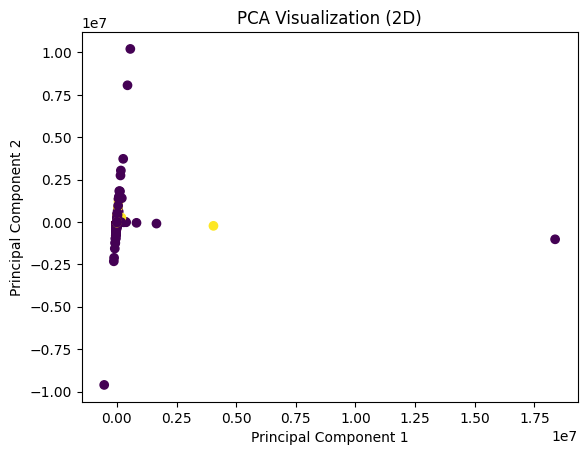

Solving using Gradient Descent


 45%|████▍     | 448/1000 [00:03<00:03, 143.19it/s]


The Model stopped learning !!


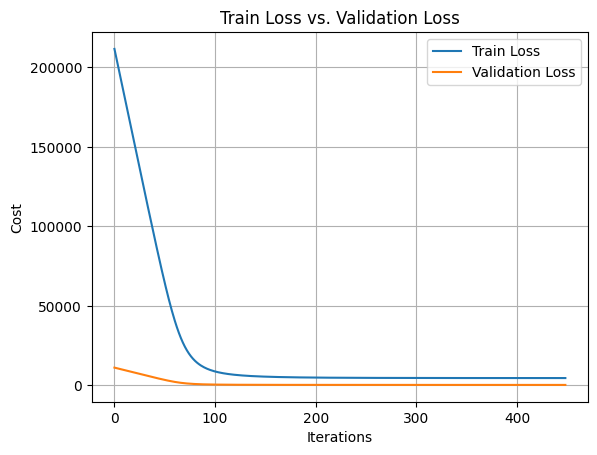

Evaluate the Validation results
The recall of the model was 0.0
The precision of the model was 0.0
The F1 score of the model was 0.0
The accuracy of the model was 0.952191235059761


In [75]:
Bankrupcy_sr_bin.fit()

In [76]:
# Calculating Testing results

recall, precision, f_score,accuracy = Bankrupcy_sr_bin.evaluateFunction(Bankrupcy_sr_bin.y_test, Bankrupcy_sr_bin.predict(Bankrupcy_sr_bin.X_test,1))
print("Model Performance on Testing Dataset: ")
print("The recall of the model was {}".format(recall))
print("The precision of the model was {}".format(precision))
print("The F1 score of the model was {}".format(f_score))
print("The accuracy of the model was {}".format(accuracy))

Model Performance on Testing Dataset: 
The recall of the model was 0.0
The precision of the model was 0.0
The F1 score of the model was 0.0
The accuracy of the model was 0.9523486901535682


# Hard Margin Support Vector Machine (SVM) :

In [45]:
## Feature Scaling for SVM Model


def minmax_scaler(data, feature_range=(0, 1)):

        min_vals = np.min(data, axis=0)
        max_vals = np.max(data, axis=0)

        # Calculate range of each feature
        data_range = max_vals - min_vals

        # Calculate scaling factor for each feature
        scale = (feature_range[1] - feature_range[0]) / data_range

        # Scale the data for each feature
        scaled_data = (data - min_vals) * scale + feature_range[0]

        return scaled_data,(min_vals,max_vals)


def test_scaling(data,scaling):
        data_range=scaling[1] - scaling[0]
        scale=1/data_range
        scaled_data= (data - scaling[0])*scale
        return scaled_data

Training Vs Validation Loss for Hard Margin SVM: 


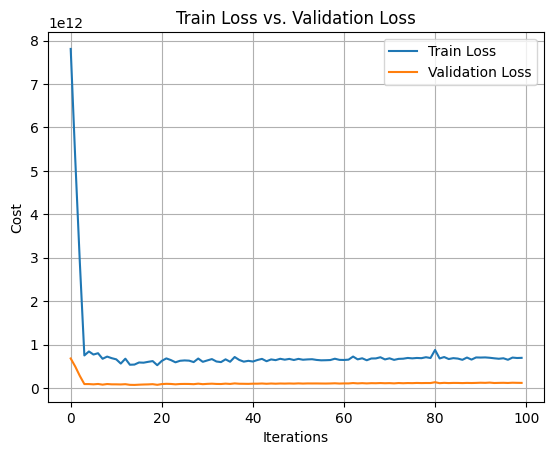

SVM Test Dataset Results: 
F1score: 0.12
Accuracy: 0.87
Precision: 0.09
Recall: 0.18


In [51]:
class HardMargSVM:

    def __init__(self, alpha = 0.1, lamda = 0.0000001, n_iters=100):
        self.alpha = alpha
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        train_loss=[]
        val_loss=[]
        X,X_val,y,y_val=train_test_split(X,y,test_size=0.15,random_state=42, stratify=y)

        n_samples, n_features = X.shape
        label = np.where(y<=0,-1,1) #convert output variable values to -1 and +1

        self.w = np.zeros(n_features)
        self.b = 0

        for i in range(self.n_iters):
            for index, ele in enumerate(X):
                condition = label[index] * (np.dot(ele, self.w) + self.b) >=1

                if condition:
                    self.w = self.w + self.alpha *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.alpha*(2 * self.lamda * self.w - np.dot(ele, label[index]))
                    self.b = self.b - self.alpha * (-label[index])
            t_l=self.hinge_loss(X,y)
            v_l=self.hinge_loss(X_val,y_val)
            train_loss.append(t_l)
            val_loss.append(v_l)
        self.plot_cost(train_loss,val_loss)

    def hinge_loss(self,X,y):


        # Compute the decision function output
        decision = np.dot(X, self.w) + self.b

        # Compute the hinge loss for each sample
        hinge_loss = np.maximum(0, 1 - y * decision)

        # Compute the total hinge loss
        total_loss = np.sum(hinge_loss)

        return total_loss


    def predict(self, X, Y):
        # Predict labels
       # X=self.test_scaling(X,self.scale)
        y_pred = np.sign(np.dot(X, self.w) + self.b)

        # Evaluate predictions
        accuracy, precision, recall = self.evaluate(Y, y_pred)

        # Print evaluation metrics
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")




    def plot_cost(self, train_loss, val_loss):
        # Data for plotting
        t = np.arange(len(train_loss))  # Assuming train_loss and val_loss have the same length

        fig, ax = plt.subplots()
        ax.plot(t, train_loss, label='Train Loss')
        ax.plot(t, val_loss, label='Validation Loss')

        ax.set(xlabel='Iterations', ylabel='Cost', title='Train Loss vs. Validation Loss')
        ax.grid()

        ax.legend()
        plt.show()

    def evaluate(self,y,y_hat):
        y=(y==1)
        y_hat=(y_hat == 1)
        # Calculate accuracy
        accuracy = np.mean(y == y_hat)

        # Calculate precision (handle division by zero)
        true_positives = np.sum(y & y_hat)
        predicted_positives = np.sum(y_hat)
        precision = true_positives / predicted_positives if predicted_positives != 0 else 0

        # Calculate recall
        recall = true_positives / np.sum(y)

        f1_score= (2* precision *recall)/(precision+recall)
        print(f"F1score: {f1_score:.2f}")

        return accuracy, precision, recall


#training metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#X_train,scale=minmax_scaler(X_train)
#X_test=test_scaling(X_test,scale)
svm10 = HardMargSVM()
print('Training Vs Validation Loss for Hard Margin SVM: ')
svm10.fit(np.array(X_train),np.array(y_train))
print('SVM Test Dataset Results: ')
svm10.predict(np.array(X_test),np.array(y_test))

In [70]:
X,X_val,y,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=42, stratify=y_train)
print('Hard Margin SVM Performance on Vaidation Data Set: ')
svm10.predict(np.array(X_val),np.array(y_val))

# Logistic Regression Ensemble Class

In [86]:
class LogisticRegressionEnsemble:
    def __init__(self,X,y,n_itertion):
        self.X=X
        self.y=y
        self.n_itertion=n_itertion
        self.X_t, self.X_test, self.y_t, self.y_test = train_test_split(self.X, self.y, test_size=0.15, random_state=42, stratify=self.y)
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_t, self.y_t, test_size=0.10, random_state=42, stratify=self.y_t)
        self.create_df()
        self.preprocess_data()
        self.models = []

    def fit(self):
        for df in self.resulted_df:
            X=df.drop(columns=['Class'])
            y=df['Class']
            smote = SMOTE(sampling_strategy='auto')  # By default, SMOTE will balance the classes
            X, y = smote.fit_resample(X, y)
            model = LogisticRegression(X,y,tolerance = 0.1, learningRate = 0.1e-5, maxIteration = self.n_itertion)
            model.fit_ensemble()
            self.models.append(model)

    def predict_proba(self, X,t):
        probas = np.zeros((X.shape[0],))  # Initialize array for predicted probabilities
        for model in self.models:
            probas += model.predict(X,t)
        probas /= self.imbalance_ratio  # Compute the average of probabilities
        rounded_probas = np.around(probas)  # Round the probabilities to 0 or 1
        return rounded_probas.astype(int)
    def test_predictions(self):
      y_test_pred = self.predict_proba(self.X_test,1)
      return y_test_pred
    def val_predictions(self):
      y_test_pred = self.predict_proba(self.X_val,1)
      return y_test_pred
    def preprocess_data(self):
      self.imbalance_ratio, self.resulted_df = self.balance_data(self.df_upd)

    def create_df(self):
      t = self.X_train
      t['Class'] = self.y_train
      self.df_upd=t


    def balance_data(self, df_upd):
        if len(df_upd[df_upd['Class']==0]) > len(df_upd[df_upd['Class']==1]):
            imbalance_ratio = len(df_upd[df_upd['Class']==0]) // len(df_upd[df_upd['Class']==1])
        elif len(df_upd[df_upd['Class']==0]) < len(df_upd[df_upd['Class']==1]):
            imbalance_ratio = len(df_upd[df_upd['Class']==1]) // len(df_upd[df_upd['Class']==0])
        else:
            imbalance_ratio = 1

        class_1_df = df_upd[df_upd['Class'] == 1]
        class_0_split = {}
        for label, group in df_upd[df_upd['Class'] == 0].groupby('years_before_bankruptcy_prediction'):
            class_0_split[label] = group.reset_index(drop=True)

        class0_len = len(df_upd[df_upd['Class']==0])
        prop = {}
        for i in range(1,6):
            prop[i] = (len(class_0_split[i])/class0_len)/imbalance_ratio

        r = {}
        for i in range(1,6):
            r[i]=0

        result_dfs = []
        for i in range(imbalance_ratio):
            class_0_records = []
            row_cnt=0
            while row_cnt < len(df_upd[df_upd['Class']==1]) + 1:
                for j in range(1,6):
                    rows = int(prop[j]*len(class_0_split[j]))
                    class_0_records.append(class_0_split[j].iloc[r[j]:(r[j]+rows),:])
                    r[j] = r[j] + rows
                    row_cnt = row_cnt + rows
            merged_df = pd.concat(class_0_records + [class_1_df])
            shuffled_df = merged_df.sample(frac=1, random_state=42)

            print('Distribution of years_before_bankruptcy_predictionf :{}  &  Class : {}'.format(Counter(shuffled_df['years_before_bankruptcy_prediction']), Counter(shuffled_df['Class'])))
            result_dfs.append(shuffled_df)

        return imbalance_ratio, result_dfs


    def evaluateFunction(self, y, y_hat):

        y = (y == 1)
        y_hat = (y_hat == 1)

    # Calculate precision, recall, F1-score, and support
        precision, recall, f_score, _ = precision_recall_fscore_support(y, y_hat, average='binary')

    # Calculate accuracy
        accuracy = accuracy_score(y, y_hat)

        print("The recall of the model was   {}".format(recall))
        print("The precision of the model was   {}".format(precision))
        print("The F1 score of the model was   {}".format(f_score))
        print("The accuracy of the model was   {}".format(accuracy))

# Model Initialisation:

In [87]:
ens = LogisticRegressionEnsemble(X,y,300)

Distribution of years_before_bankruptcy_predictionf :Counter({3: 567, 2: 531, 4: 495, 1: 308, 5: 287})  &  Class : Counter({0: 1115, 1: 1073})
Distribution of years_before_bankruptcy_predictionf :Counter({3: 567, 2: 531, 4: 495, 1: 308, 5: 287})  &  Class : Counter({0: 1115, 1: 1073})
Distribution of years_before_bankruptcy_predictionf :Counter({3: 567, 2: 531, 4: 495, 1: 308, 5: 287})  &  Class : Counter({0: 1115, 1: 1073})
Distribution of years_before_bankruptcy_predictionf :Counter({3: 567, 2: 531, 4: 495, 1: 308, 5: 287})  &  Class : Counter({0: 1115, 1: 1073})
Distribution of years_before_bankruptcy_predictionf :Counter({3: 567, 2: 531, 4: 495, 1: 308, 5: 287})  &  Class : Counter({0: 1115, 1: 1073})
Distribution of years_before_bankruptcy_predictionf :Counter({3: 567, 2: 531, 4: 495, 1: 308, 5: 287})  &  Class : Counter({0: 1115, 1: 1073})
Distribution of years_before_bankruptcy_predictionf :Counter({3: 567, 2: 531, 4: 495, 1: 308, 5: 287})  &  Class : Counter({0: 1115, 1: 1073})

In [88]:
ens.fit()

In [89]:
#  Performance of LogisticRegressionEnsemble on Validation Data Set:

y_v_p = ens.val_predictions()
print('Performance of LogisticRegressionEnsemble on Testing Data Set:')
ens.evaluateFunction(ens.y_val,y_v_p)

Performance of LogisticRegressionEnsemble on Testing Data Set:
The recall of the model was   1.0
The precision of the model was   0.0474481658692185
The F1 score of the model was   0.09059763989341454
The accuracy of the model was   0.047827819848545235


In [90]:
#  Performance of LogisticRegressionEnsemble on Testing Data Set:

y_P = ens.test_predictions()
print('Performance of LogisticRegressionEnsemble on Testing Data Set:')
ens.evaluateFunction(ens.y_test,y_P)

Performance of LogisticRegressionEnsemble on Testing Data Set:
The recall of the model was   1.0
The precision of the model was   0.047446904654315405
The F1 score of the model was   0.090595340811044
The accuracy of the model was   0.04787714543812105


# NEURAL NETWORK

In [92]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=42, stratify=y_t)
class_weights = {0: 1, 1: 1.5}

In [93]:
from tensorflow.keras import models, layers, metrics

def build_model(input_shape):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dropout(0.5),  # Adding dropout regularization to prevent overfitting
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', metrics.Recall(), metrics.Precision(), metrics.AUC(name='auc')])
    return model

# Assuming input_shape is (32,) based on the number of features
input_shape = (32,)
model = build_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14593 (57.00 KB)
Trainable params: 14593 (

In [94]:
# Train the model

smote = SMOTE(sampling_strategy='auto')  # By default, SMOTE will balance the classes
X_train, y_train = smote.fit_resample(X_train, y_train)
history = model.fit(X_train, y_train,
                    batch_size=32,  # Adjust batch size as needed
                    epochs=20,      # Adjust number of epochs as needed
                    validation_data=(X_val, y_val))



Epoch 1/20
1195/1195 [==============================] - 4s 2ms/step - loss: 97.6319 - accuracy: 0.5448 - recall: 0.5254 - precision: 0.5466 - auc: 0.5503 - val_loss: 46.8745 - val_accuracy: 0.8142 - val_recall: 0.4524 - val_precision: 0.1184 - val_auc: 0.6672
Epoch 2/20
1195/1195 [==============================] - 2s 2ms/step - loss: 30.1684 - accuracy: 0.5451 - recall: 0.5263 - precision: 0.5469 - auc: 0.5555 - val_loss: 6.4800 - val_accuracy: 0.5819 - val_recall: 0.3810 - val_precision: 0.0444 - val_auc: 0.4596
Epoch 3/20
1195/1195 [==============================] - 2s 2ms/step - loss: 12.2266 - accuracy: 0.5196 - recall: 0.5799 - precision: 0.5175 - auc: 0.5387 - val_loss: 1.2474 - val_accuracy: 0.6897 - val_recall: 0.4940 - val_precision: 0.0757 - val_auc: 0.5923
Epoch 4/20
1195/1195 [==============================] - 3s 2ms/step - loss: 6.3408 - accuracy: 0.5176 - recall: 0.5518 - precision: 0.5165 - auc: 0.5323 - val_loss: 2.2210 - val_accuracy: 0.6578 - val_recall: 0.5536 - val_

In [95]:
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

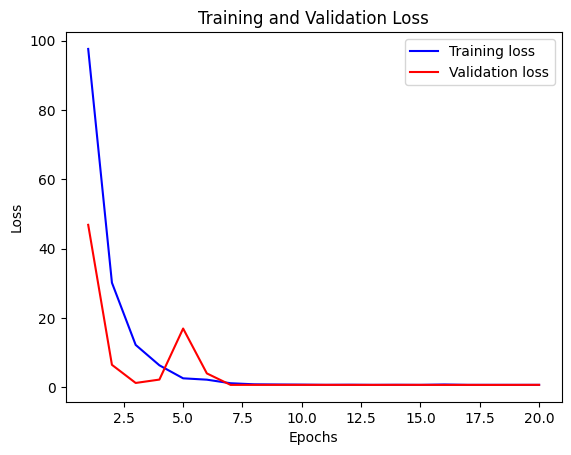

In [96]:
plot_loss(history)

185/185 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [99]:
# Evaluate the model
def predict(X):
  return  np.around(model.predict(X_test))

def evaluateFunction(y, y_hat):

        y = (y == 1)
        y_hat = (y_hat == 1)

    # Calculate precision, recall, F1-score, and support
        precision, recall, f_score, _ = precision_recall_fscore_support(y, y_hat, average='binary')

    # Calculate accuracy
        accuracy = accuracy_score(y, y_hat)

        print("The recall of the model was   {}".format(recall))
        print("The precision of the model was   {}".format(precision))
        print("The F1 score of the model was   {}".format(f_score))
        print("The accuracy of the model was   {}".format(accuracy))



In [101]:
# Neural Network Model Performance on Testing Datasets:

print('Neural Network Model Performance on Testing Datasets: ')

evaluateFunction(y_test,predict(X_test))

Neural Network Model Performance on Testing Datasets: 
185/185 [==============================] - 0s 993us/step
The recall of the model was   0.9892857142857143
The precision of the model was   0.04791558553883411
The F1 score of the model was   0.09140405873618217
The accuracy of the model was   0.06708453328815857
